<a href="https://colab.research.google.com/github/gautumsvp7/SolarDataSetPublic/blob/main/Solar_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving solar-energy-production-sites-1.csv to solar-energy-production-sites-1 (1).csv


In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  


from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['solar-energy-production-sites-1.csv'])) 
print(df)

                          Facility Name  ...                                 Address / Location
0    Veterans Memorial Community Center  ...       101 S Pavilion Center\nLas Vegas, NV 89144\n
1    Veterans Memorial Community Center  ...       101 S Pavilion Center\nLas Vegas, NV 89144\n
2    Veterans Memorial Community Center  ...       101 S Pavilion Center\nLas Vegas, NV 89144\n
3    Veterans Memorial Community Center  ...       101 S Pavilion Center\nLas Vegas, NV 89144\n
4    Veterans Memorial Community Center  ...       101 S Pavilion Center\nLas Vegas, NV 89144\n
..                                  ...  ...                                                ...
377                    Ed Fountain Park  ...  1400 N Decatur Blvd\nLas Vegas, NV 89108\n(36....
378    Durango Hills Community Center S  ...  3521 N Durango Dr\nLas Vegas, NV 89129\n(36.22...
379                     Fire Station 44  ...  7701 W Washington Ave\nLas Vegas, NV 89128\n(3...
380               Centennial Hills Park 

In [ ]:
df.describe()

,KW Rating,KWH Generated,Generated
count,382.000000,3.820000e+02,382.000000
mean,195.302618,3.724244e+05,32259.801047
std,658.166173,1.338346e+06,119224.015824
min,15.300000,2.745200e+04,1136.000000
25%,30.100000,4.942500e+04,4245.750000
50%,44.500000,7.208900e+04,6697.000000
75%,100.000000,1.468800e+05,11163.000000
max,3334.000000,6.759539e+06,805458.000000


In [ ]:
print(df.groupby('Facility Name').size())

Facility Name
All American Park                           9
Centennial Hills Community Center N & S     9
Centennial Hills Park                      11
Durango Hills Community Center S           10
East Las Vegas Community Center            13
East Yard - Fire Equipment Center           9
East Yard - Main Gate 1                    17
East Yard - Sign Shop                      17
Ed Fountain Park                            9
Fire Station 10                            13
Fire Station 106                            8
Fire Station 107                            9
Fire Station 41                            13
Fire Station 43                            14
Fire Station 44                            13
Fire Station 45                            13
Fire Station 48                            13
Fire Station 5                             13
Fire Station 6                             13
Fire Station 7                             13
Fire Station 8                             13
Lorenzi Park        

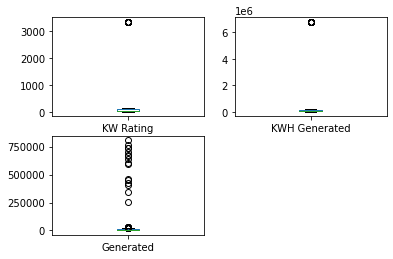

In [ ]:
#Data Visualiztion
df.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey =False)
plt.show()

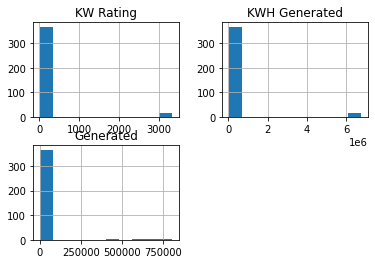

In [ ]:
df.hist()
plt.show()

In [ ]:
copy_df = df
f_names =set(copy_df['Facility Name'])


In [ ]:
for col in copy_df.columns:
  print(col)

Facility Name
KW Rating
KWH Generated
Date
Generated
Address / Location


In [ ]:
trimmed_df=copy_df.drop(['Date','Address / Location'],axis=1)

In [ ]:
trimmed_df

,Facility Name,KW Rating,KWH Generated,Generated
0,Veterans Memorial Community Center,116.2,218498,22603
1,Veterans Memorial Community Center,116.2,218498,23330
2,Veterans Memorial Community Center,116.2,218498,17678
3,Veterans Memorial Community Center,116.2,218498,14427
4,Veterans Memorial Community Center,116.2,218498,10828
...,...,...,...,...
377,Ed Fountain Park,144.5,151050,20100
378,Durango Hills Community Center S,33.6,45246,2832
379,Fire Station 44,30.0,57914,6012
380,Centennial Hills Park,30.1,38876,4998


In [ ]:
#creating dictionary to replace the names for easier analysis
list_loc = list(f_names)
d_loc = {}
ni = 0
for i in list_loc:
  d_loc[i] = ni
  ni += 1
print(d_loc)
#print(f_names)

{'Veterans Memorial Community Center': 0, 'Fire Station 7': 1, 'Fire Station 48': 2, 'Natural History Museum': 3, 'WPCF Plant': 4, 'East Yard - Fire Equipment Center': 5, 'Fire Station 107': 6, 'Fire Station 5': 7, 'West Yard - Vehicle Services': 8, 'East Las Vegas Community Center': 9, 'Fire Station 8': 10, 'East Yard - Main Gate 1': 11, 'Fire Station 6': 12, 'Fire Station 41': 13, 'Stupak Community Center': 14, 'Fire Station 43': 15, 'East Yard - Sign Shop': 16, 'Ed Fountain Park': 17, 'Fire Station 45': 18, 'Fire Station 44': 19, 'Fire Station 106': 20, 'Lorenzi Park': 21, 'Fire Station 10': 22, 'West Yard - EOC': 23, 'Durango Hills Community Center S': 24, 'West Yard - Operations-Maintenance': 25, 'Centennial Hills Park': 26, 'Mirabelli Community Center': 27, 'Centennial Hills Community Center N & S': 28, 'Rainbow Park': 29, 'All American Park': 30}


In [ ]:
len(d_loc.keys())

31

In [ ]:
test_df = trimmed_df

In [ ]:
nest_d = {'Facility Name':d_loc}
print(nest_d)

{'Facility Name': {'Veterans Memorial Community Center': 0, 'Fire Station 7': 1, 'Fire Station 48': 2, 'Natural History Museum': 3, 'WPCF Plant': 4, 'East Yard - Fire Equipment Center': 5, 'Fire Station 107': 6, 'Fire Station 5': 7, 'West Yard - Vehicle Services': 8, 'East Las Vegas Community Center': 9, 'Fire Station 8': 10, 'East Yard - Main Gate 1': 11, 'Fire Station 6': 12, 'Fire Station 41': 13, 'Stupak Community Center': 14, 'Fire Station 43': 15, 'East Yard - Sign Shop': 16, 'Ed Fountain Park': 17, 'Fire Station 45': 18, 'Fire Station 44': 19, 'Fire Station 106': 20, 'Lorenzi Park': 21, 'Fire Station 10': 22, 'West Yard - EOC': 23, 'Durango Hills Community Center S': 24, 'West Yard - Operations-Maintenance': 25, 'Centennial Hills Park': 26, 'Mirabelli Community Center': 27, 'Centennial Hills Community Center N & S': 28, 'Rainbow Park': 29, 'All American Park': 30}}


In [ ]:
final_df = test_df.replace(to_replace = nest_d, value= None)

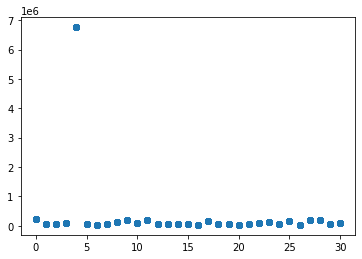

In [ ]:
x1 = final_df['Facility Name']
x2 = final_df['KWH Generated']
plt.scatter(x1,x2)
plt.show()

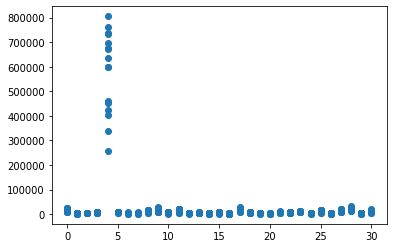

In [ ]:
x1 = final_df['Facility Name']
x2 = final_df['Generated']
plt.scatter(x1,x2)
plt.show()


final_df should be used from this point onwards.
Facitlity name is the dependent variable.

# Training a model

In [ ]:

array = final_df.values
print(array)


[[0.00000e+00 1.16200e+02 2.18498e+05 2.26030e+04]
 [0.00000e+00 1.16200e+02 2.18498e+05 2.33300e+04]
 [0.00000e+00 1.16200e+02 2.18498e+05 1.76780e+04]
 ...
 [1.90000e+01 3.00000e+01 5.79140e+04 6.01200e+03]
 [2.60000e+01 3.01000e+01 3.88760e+04 4.99800e+03]
 [2.50000e+01 7.93000e+01 1.46880e+05 1.09600e+04]]


In [ ]:
final_df.shape

(382, 4)

To find the optimal numbers of clusters for applying K means, we are applying 'Elbow method'

In [ ]:
X = final_df


In [ ]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 



In [ ]:

for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 


1 : 537112.7601077189
2 : 52534.97425107718
3 : 25268.337705550955
4 : 21728.465759652187
5 : 16799.945946934367
6 : 12313.343507771237
7 : 11598.650782397424
8 : 11085.256218994919
9 : 9445.567384628264


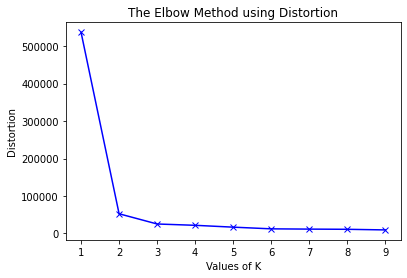

In [ ]:

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 


The value of K should be 2, as evident from the above graph

In [ ]:
kmean = KMeans(n_clusters = 2,n_init=10,max_iter=300)
kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
y_predicted = kmean.fit_predict(X[['KW Rating','KWH Generated','Generated']])
y_predicted

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 7, 6, 8, 8,
       7, 7, 2, 3, 5, 8, 4, 6, 2, 2, 2, 6, 2, 7, 7, 7, 2, 3, 7, 1, 3, 8,
       2, 6, 1, 6, 2, 6, 5, 8, 7, 1, 5, 7, 2, 7, 7, 5, 4, 4, 6, 6, 2, 6,
       8, 1, 3, 7, 7, 7, 8, 6, 7, 1, 2, 2, 7, 4, 8, 8, 2, 8, 8, 3, 7, 7,
       5, 2, 2, 8, 2, 0, 0, 3, 8, 2, 3, 0, 8, 7, 8, 3, 1, 1, 3, 1, 2, 2,
       1, 6, 8, 4, 2, 0, 7, 2, 1, 8, 3, 3, 5, 5, 7, 2, 0, 7, 1, 2, 5, 7,
       3, 4, 3, 2, 3, 2, 5, 7, 5, 3, 1, 2, 2, 2, 4, 3, 1, 7, 2, 3, 6, 7,
       3, 1, 2, 6, 7, 8, 7, 3, 8, 2, 1, 7, 2, 1, 7, 7, 3, 3, 7, 2, 1, 3,
       7, 7, 6, 8, 6, 1, 8, 1, 5, 7, 8, 7, 8, 1, 1, 6, 8, 7, 7, 7, 3, 6,
       0, 8, 0, 1, 1, 3, 7, 0, 8, 2, 3, 8, 8, 2, 3, 7, 1, 0, 7, 6, 1, 6,
       2, 2, 2, 1, 3, 8, 2, 4, 5, 8, 6, 5, 2, 6, 7, 3, 5, 5, 1, 6, 8, 2,
       2, 8, 8, 4, 5, 8, 6, 7, 8, 2, 7, 7, 7, 0, 0, 7, 2, 8, 8, 7, 2, 2,
       8, 3, 7, 3, 4, 8, 4, 8, 2, 6, 3, 2, 0, 0, 5,

In [ ]:
X['cluster'] = y_predicted
X.head()

,Facility Name,KW Rating,KWH Generated,Generated,cluster
0,0,116.2,218498,22603,8
1,0,116.2,218498,23330,8
2,0,116.2,218498,17678,8
3,0,116.2,218498,14427,8
4,0,116.2,218498,10828,8


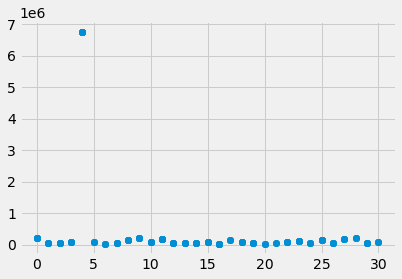

In [43]:
plt.scatter(X['Facility Name'],X['KWH Generated'])

In [ ]:
kmean.inertia_

435080427656.5637

In [ ]:
kmean.cluster_centers_

array([[1.49617486e+01, 5.80918033e+01, 9.32062951e+04, 8.37138525e+03],
       [4.00000000e+00, 3.33400000e+03, 6.75953900e+06, 5.78707312e+05]])

In [ ]:
kmean.n_iter_

2

In [46]:
set(X['cluster'])

{0, 1, 2, 3, 4, 5, 6, 7, 8}

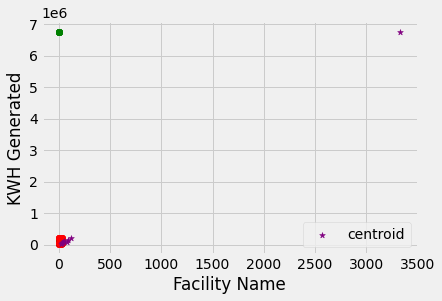

In [48]:
df0 = X[X.cluster==0]
df1 = X[X.cluster==1]
df2 = X[X.cluster==2]
df3 = X[X.cluster==3]
df4 = X[X.cluster==4]
df5 = X[X.cluster==5]
df6 = X[X.cluster==6]
df7 = X[X.cluster==7]
df8 = X[X.cluster==8]

plt.scatter(df0['Facility Name'],df0['KWH Generated'],color='green')
plt.scatter(df1['Facility Name'],df1['KWH Generated'],color='red')
plt.scatter(df2['Facility Name'],df2['KWH Generated'],color='black')
plt.scatter(df3['Facility Name'],df3['KWH Generated'],color='green')
plt.scatter(df4['Facility Name'],df4['KWH Generated'],color='red')
plt.scatter(df5['Facility Name'],df5['KWH Generated'],color='black')
plt.scatter(df6['Facility Name'],df6['KWH Generated'],color='green')
plt.scatter(df7['Facility Name'],df7['KWH Generated'],color='red')
plt.scatter(df8['Facility Name'],df8['KWH Generated'],color='red')

plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Facility Name')
plt.ylabel('KWH Generated')
plt.legend()

Cluster 1 Inertia 687852072982184.5
Cluster 2 Inertia 1607276938487.0288
Cluster 3 Inertia 627783396268.5453
Cluster 4 Inertia 284523705377.54126
Cluster 5 Inertia 185582727077.89856
Cluster 6 Inertia 126188272097.65282
Cluster 7 Inertia 95348342955.58191
Cluster 8 Inertia 71080578446.61986
Cluster 9 Inertia 55662634550.8513
Cluster 10 Inertia 46772885182.61075
Cluster 11 Inertia 38202468371.80032
Cluster 12 Inertia 29061535088.65426
Cluster 13 Inertia 22288360766.524593
Cluster 14 Inertia 18938649516.524593
Cluster 15 Inertia 16639668258.481651
Cluster 16 Inertia 14222014330.284214
Cluster 17 Inertia 11779617158.617546
Cluster 18 Inertia 10499784667.295223
Cluster 19 Inertia 8932701114.013514


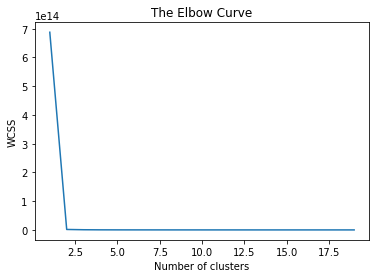

In [ ]:
wcss = []
for i in range(1,20):
 kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
 kmeans.fit(X)
 wcss.append(kmeans.inertia_)
 print("Cluster", i, "Inertia", kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title("The Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS") ##WCSS stands for total within-cluster sum of square
plt.show()

## TRYING FROM :
https://realpython.com/k-means-clustering-python/

Elbow method:

In [ ]:
kmeans_kwargs = {"init":"random","n_init":10,"max_iter":300,"random_state":42}
sse = []
for k in range(1,11):
  kmeans= KMeans(n_clusters = k,**kmeans_kwargs)
  kmeans.fit(final_df)
  sse.append(kmeans.inertia_)

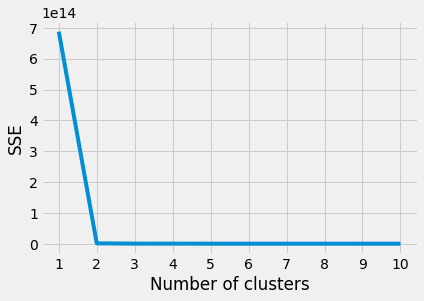

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()


Silhouette coefficient

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_coefficients = []
for k in range(2,10):
  kmean = KMeans(n_clusters=k,**kmeans_kwargs)
  kmeans.fit(final_df)
  score = silhouette_score(final_df,kmeans.labels_)
  silhouette_coefficients.append(score)


In [ ]:
len(silhouette_coefficients)

8

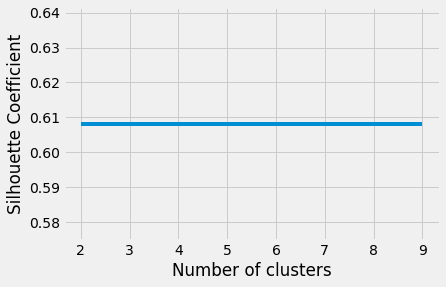

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,10),silhouette_coefficients)
plt.xticks(range(2,10))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Trying to visualize the groups